# Final Project - Python (Basic)
# Salman Sabahi
# Created on Nov 6, 2018

## Pokemon DB :
## Download the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0
## Try to explore and see what is in the DB:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from scipy import stats
from scipy.stats import pearsonr
import operator
from mlxtend.preprocessing import standardize
%matplotlib inline

In [2]:
con = sql.connect("./data/pokedex.sqlite")
cur = con.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' ;")
table_ls = cur.fetchall()
table_df = pd.DataFrame(table_ls) # adding table of dataframes to the pokemon database
table_df.to_sql(name = "table_df", con = con, index = False,
        if_exists = 'append' )
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' ;")
cur.fetchall()


[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

## Types :
## Write a query to output the type_id, name for different type of Pokemon and only when the language is English. You should see an output like this :

In [3]:
cur.execute("SELECT type_id, name FROM type_names WHERE local_language_id = 9;")
cur.fetchall()

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

## Gen 1 moves :
## Write a query to output the name of the move and name of the type for Generation 1 Pokemon. You wanna look into move_names,moves and type_names tables

In [4]:
cur.execute ("SELECT identifier, name FROM moves JOIN type_names ON moves.type_id= type_names.type_id \
WHERE (moves.generation_id = 1 AND type_names.local_language_id = 9);") 
cur.fetchall()

[('pound', 'Normal'),
 ('karate-chop', 'Fighting'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('fire-punch', 'Fire'),
 ('ice-punch', 'Ice'),
 ('thunderpunch', 'Electric'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('gust', 'Flying'),
 ('wing-attack', 'Flying'),
 ('whirlwind', 'Normal'),
 ('fly', 'Flying'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('vine-whip', 'Grass'),
 ('stomp', 'Normal'),
 ('double-kick', 'Fighting'),
 ('mega-kick', 'Normal'),
 ('jump-kick', 'Fighting'),
 ('rolling-kick', 'Fighting'),
 ('sand-attack', 'Ground'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('

## It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [5]:
con = sql.connect("./data/pokedex.sqlite")
cur = con.cursor()
com_ls = [] # list of commands
df_dic = {} # dictionary of dataframes

for i,j in enumerate(table_ls):

    query = ("SELECT * FROM {}; ".format(j[0]))
    com_ls.append(query)
    df_dic.update({f'{j[0]}':pd.read_sql_query(com_ls[i], con)})

con.close()

In [6]:
# Lets call the 'pokedex_prose' dataframe 
df_dic["pokedex_prose"].head()

pokedex_id  local_language_id             name  \
0           1                  9         National   
1           2                  9            Kanto   
2           3                  9   Original Johto   
3           4                  9            Hoenn   
4           5                  9  Original Sinnoh   

                                         description  
0                                Entire National dex  
1                          Red/Blue/Yellow Kanto dex  
2  Gold/Silver/Crystal Johto dex—called the "New"...  
3                    Ruby/Sapphire/Emerald Hoenn dex  
4                           Diamond/Pearl Sinnoh dex

## back to Pandas, some data exploration :

### Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 Lets explore:

In [7]:
pok_df = pd.read_csv('./data/Pokemon.csv')
pok_df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

## Let's rename the # column to id, and convert all column labels to lower case.

In [8]:
pok_df.columns.values[0]  = 'id'
pok_df.columns = pok_df.columns.str.lower()
pok_df.head()

id                   name type 1  type 2  total  hp  attack  defense  \
0   1              Bulbasaur  Grass  Poison    318  45      49       49   
1   2                Ivysaur  Grass  Poison    405  60      62       63   
2   3               Venusaur  Grass  Poison    525  80      82       83   
3   3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4   4             Charmander   Fire     NaN    309  39      52       43   

   sp. atk  sp. def  speed  generation  legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

##  Now let's take a look at any duplicated rows via the id column.



In [9]:
pok_df[pok_df.duplicated('id', keep=False)].head()

id                       name type 1  type 2  total  hp  attack  defense  \
2   3                   Venusaur  Grass  Poison    525  80      82       83   
3   3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
6   6                  Charizard   Fire  Flying    534  78      84       78   
7   6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8   6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   sp. atk  sp. def  speed  generation  legendary  
2      100      100     80           1      False  
3      122      120     80           1      False  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False

## Lets exclude these duplicates in our analysis except for the first instance.



In [10]:
pok_df.drop_duplicates('id',keep='first',inplace=True)

In [11]:
pok_df[pok_df.duplicated('id', keep=False)].head()

Empty DataFrame
Columns: [id, name, type 1, type 2, total, hp, attack, defense, sp. atk, sp. def, speed, generation, legendary]
Index: []

## Fill the Nan values



In [12]:
pok_df["type 2"].fillna("Nothing", inplace = True) 

In [13]:
pok_df['type 2'].head(10)

0      Poison
1      Poison
2      Poison
4     Nothing
5     Nothing
6      Flying
9     Nothing
10    Nothing
11    Nothing
13    Nothing
Name: type 2, dtype: object

### The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
### let's separate these two observational units into separate tables: pokedex and statistics.
## create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']

In [14]:
pokedex_df = pok_df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]
pokedex_df.head()

id        name type 1   type 2  generation  legendary
0   1   Bulbasaur  Grass   Poison           1      False
1   2     Ivysaur  Grass   Poison           1      False
2   3    Venusaur  Grass   Poison           1      False
4   4  Charmander   Fire  Nothing           1      False
5   5  Charmeleon   Fire  Nothing           1      False

## create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']

In [15]:
poke_statistics_df = pok_df[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']]
poke_statistics_df.head()

id  hp  attack  defense  sp. atk  sp. def  speed  total
0   1  45      49       49       65       65     45    318
1   2  60      62       63       80       80     60    405
2   3  80      82       83      100      100     80    525
4   4  39      52       43       60       50     65    309
5   5  58      64       58       80       65     80    405

### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [16]:
pok_df.groupby('generation').id.describe()

count   mean        std    min     25%    50%     75%    max
generation                                                              
1           151.0   76.0  43.734045    1.0   38.50   76.0  113.50  151.0
2           100.0  201.5  29.011492  152.0  176.75  201.5  226.25  251.0
3           135.0  319.0  39.115214  252.0  285.50  319.0  352.50  386.0
4           107.0  440.0  31.032241  387.0  413.50  440.0  466.50  493.0
5           156.0  571.5  45.177428  494.0  532.75  571.5  610.25  649.0
6            72.0  685.5  20.928450  650.0  667.75  685.5  703.25  721.0

Text(0,0.5,'# of Pokeman')

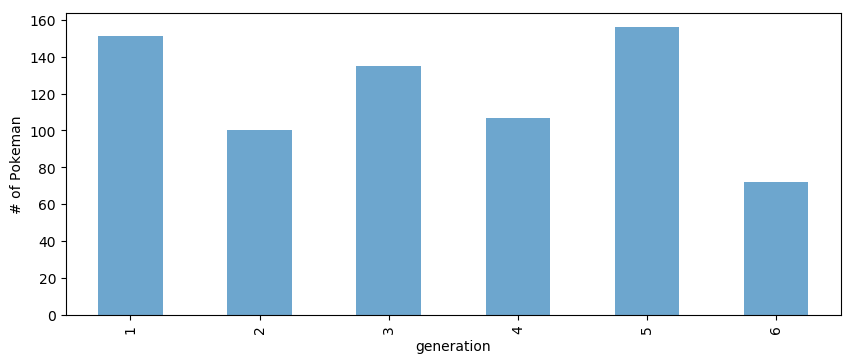

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,4), dpi = 100)
pok_df.groupby('generation')['type 1'].count().plot(kind='bar', ax=axes,alpha = 0.65)
axes.set_ylabel('# of Pokeman')

## The Seaborn Library

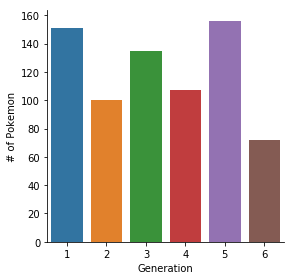

In [18]:
sns.factorplot(kind='count', data=pokedex_df, x='generation').set_axis_labels("Generation", "# of Pokemon")

## There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations. Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

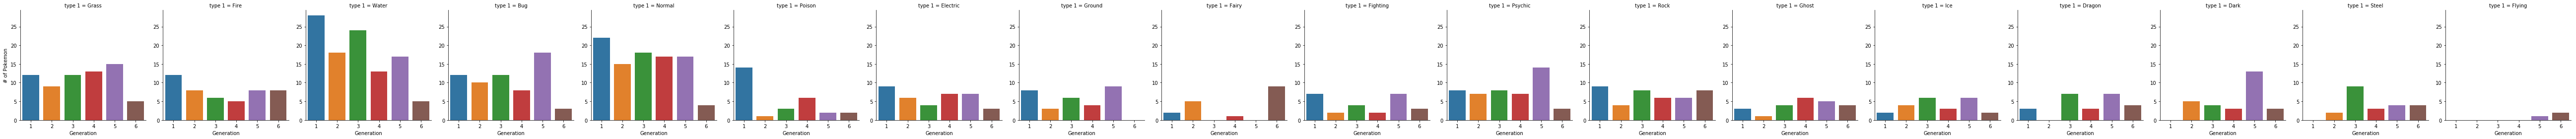

In [19]:
sns.factorplot(kind='count', 
              data=pokedex_df, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

## Add col_wrap option to the above to get below (look into sb.factorplot documentation)

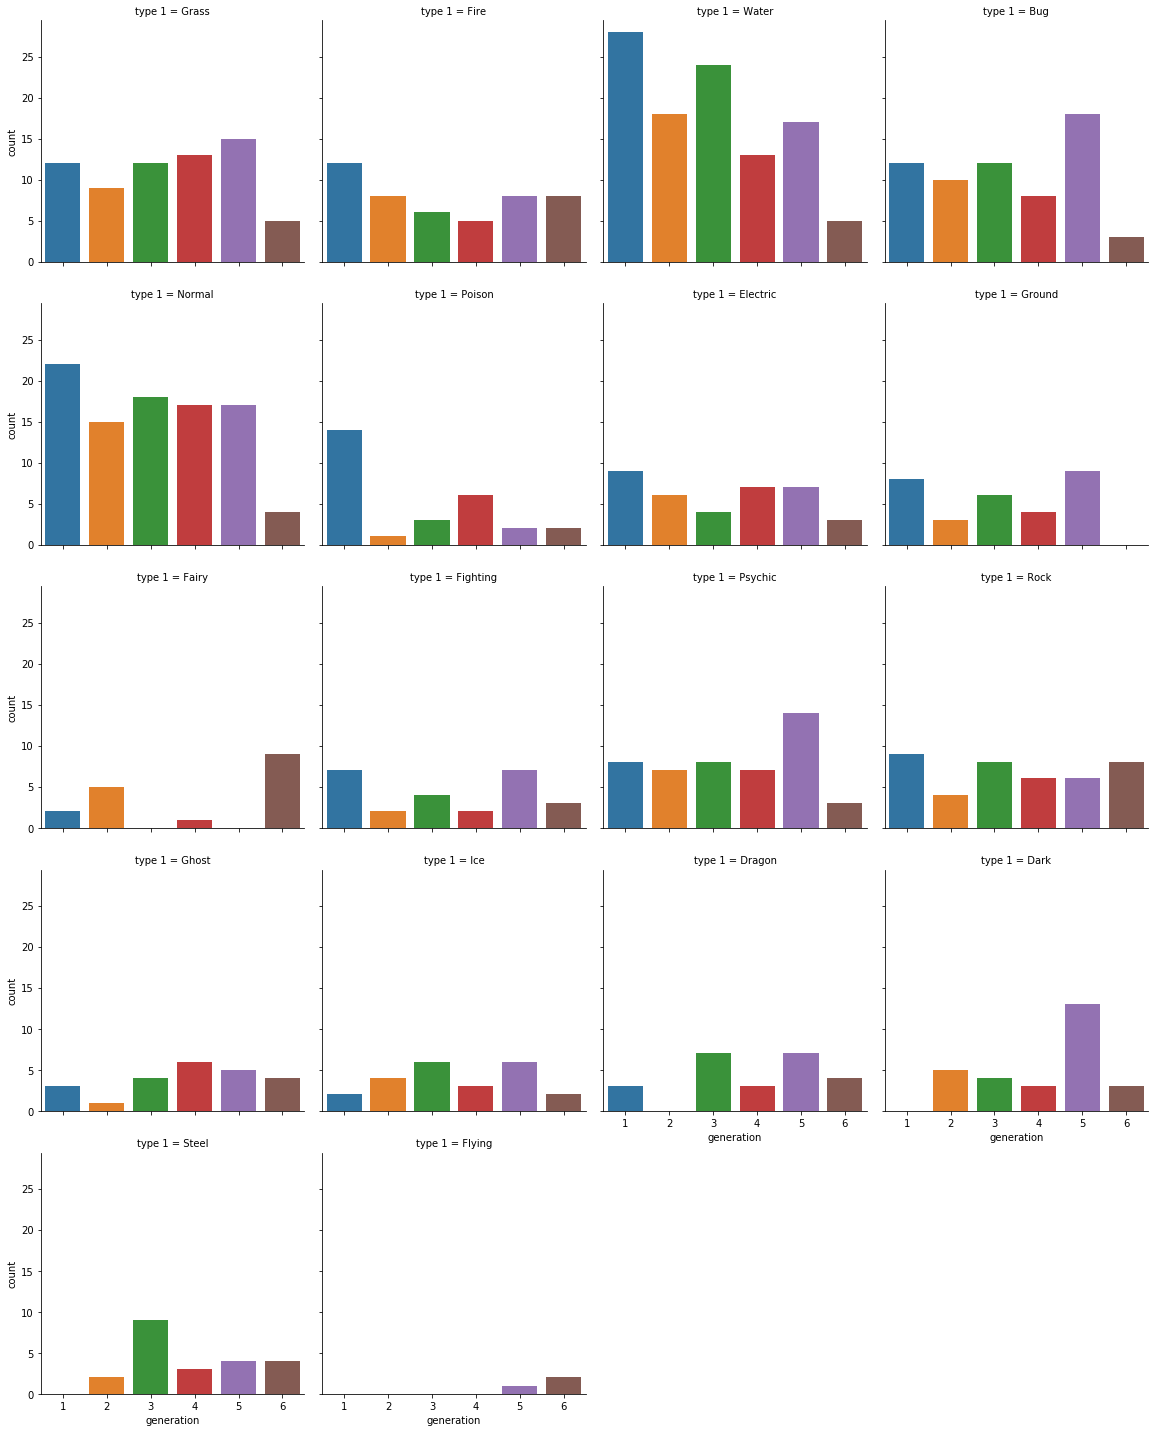

In [20]:
g = sns.factorplot(x='generation', col='type 1', data=pokedex_df, kind = 'count',col_wrap=4)

## Summarize your observations/conclusions here :

### Most of the pokemons belongs to generation one while we dont see many pokemons in generation 5 or 6 (compare to the pther generation) 
### Generation 1 doesnt have Dark, Steel, and Flying.
### Generation 2 doenst have Dragon, and Flying.
### Generation 3  doesnt have Fairy and Flying.
### Generation 5 dont have Fairy.
### Generations 6 doesnt have Ground. 

## Are there unique primary or secondary Pokemon types, or if they simply share the same ones.


In [21]:
np.setdiff1d #Return the sorted, unique values in `ar1` that are not in `ar2`.

<function numpy.lib.arraysetops.setdiff1d>

In [22]:
unique_type1 =  np.setdiff1d(pokedex_df['type 1'], pokedex_df['type 2'])
unique_type1

array([], dtype=object)

### There are no unique primary or secondary types

## Get The total number of primary and secondary types:



In [23]:
print(f"# of Type1 Pokemon {pokedex_df['type 1'].nunique()}")

# of Type1 Pokemon 18


In [24]:
print(f"# of Type2 Pokemon {pokedex_df['type 2'].nunique()}")

# of Type2 Pokemon 19


## What are the most common types of Pokemon?

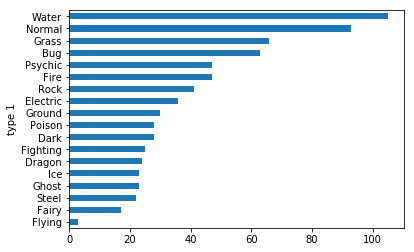

In [25]:
pokedex_df.groupby('type 1')['id'].count().sort_values(ascending=True).plot(kind='barh')

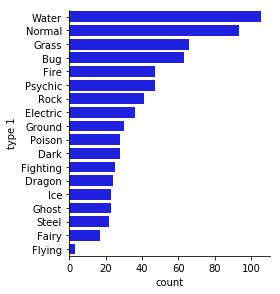

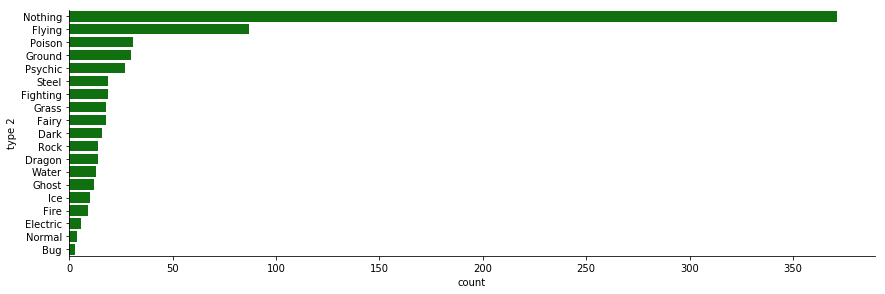

In [26]:
# Now try Seaborn:
sns.factorplot(data=pokedex_df,
               y='type 1',
                kind='count',
                 order = pokedex_df['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sns.factorplot(data=pokedex_df,
               y='type 2',
                kind='count',
                 order = pokedex_df['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

## Summarize your observations/conclusions here :

### Lots of pokemons have only one type (type 1). The fist two names appeared in  type 1 are water and normal and the most frequent name for type 2 is Flying.

## But we cannot say which type maps into which type ! Lets create a heatmap !  Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2

In [27]:
dual_types_df = pok_df[pok_df['type 2'] != 'Nothing']
dual_types_df.head()

id        name type 1  type 2  total  hp  attack  defense  sp. atk  \
0    1   Bulbasaur  Grass  Poison    318  45      49       49       65   
1    2     Ivysaur  Grass  Poison    405  60      62       63       80   
2    3    Venusaur  Grass  Poison    525  80      82       83      100   
6    6   Charizard   Fire  Flying    534  78      84       78      109   
15  12  Butterfree    Bug  Flying    395  60      45       50       90   

    sp. def  speed  generation  legendary  
0        65     45           1      False  
1        80     60           1      False  
2       100     80           1      False  
6        85    100           1      False  
15       80     70           1      False

## Get a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values and any other attributes you may need !)

In [28]:
type_df = dual_types_df.groupby(['type 1','type 2']).size().unstack()
type_df.shape

(18, 18)

## Try matplotlib imshow as a way to get a heatmap, something like this:



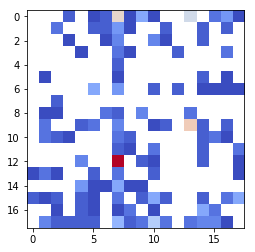

In [29]:
plt.imshow(type_df, cmap='coolwarm')

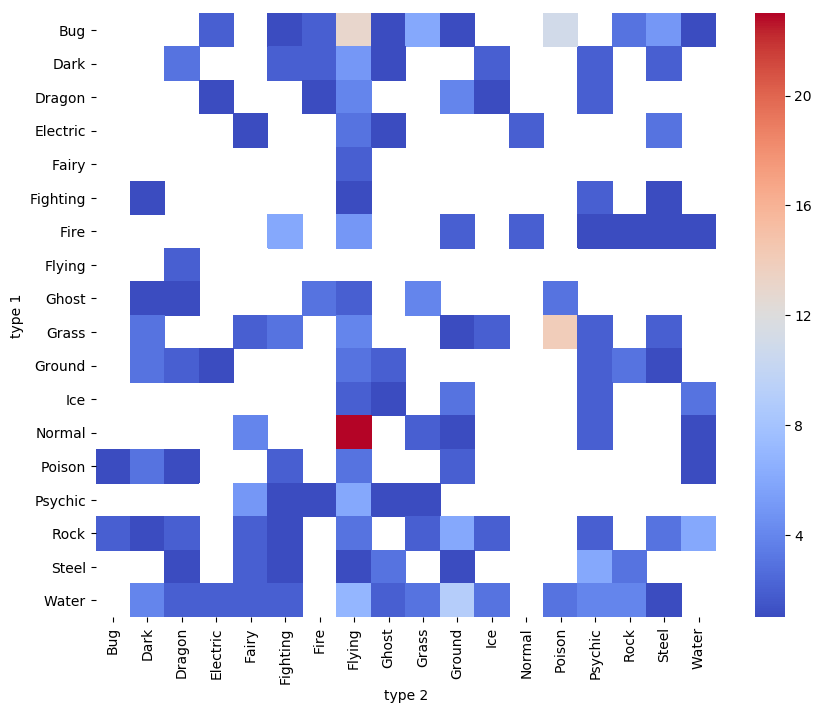

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,8), dpi = 100)
sns.heatmap(type_df, cmap='coolwarm',ax=axes)

## Refine your seaborn expression to get a better heatmap :

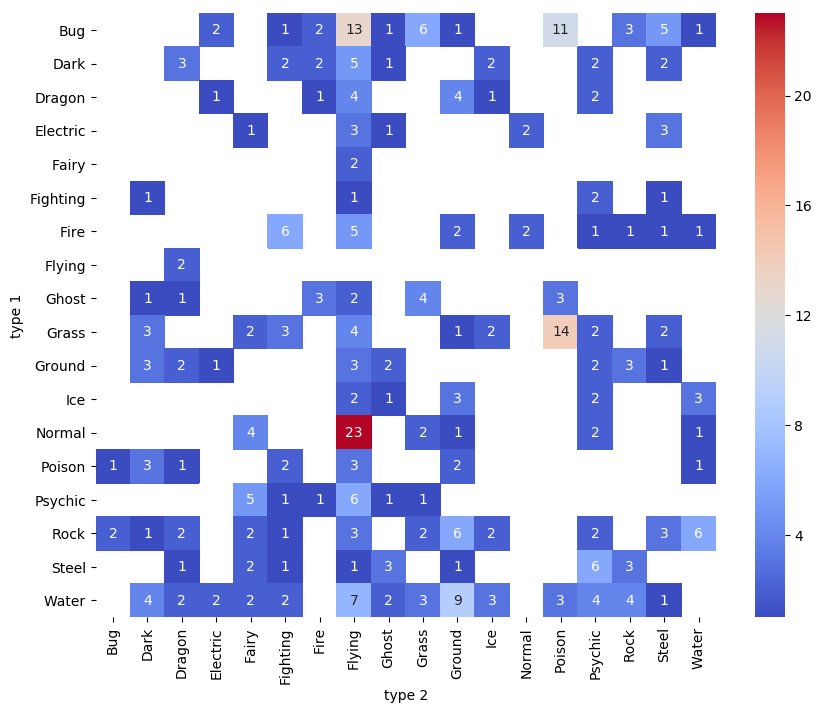

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,8), dpi = 100)
sns.heatmap(type_df, cmap='coolwarm',annot=True,ax=axes)

## Summarize your observations/conclusions here :



### The above heatmap tells us that the most frequent type is "Normal-Flying". The type 1 and type 2 are different.

## Are any of the statistics correlated?

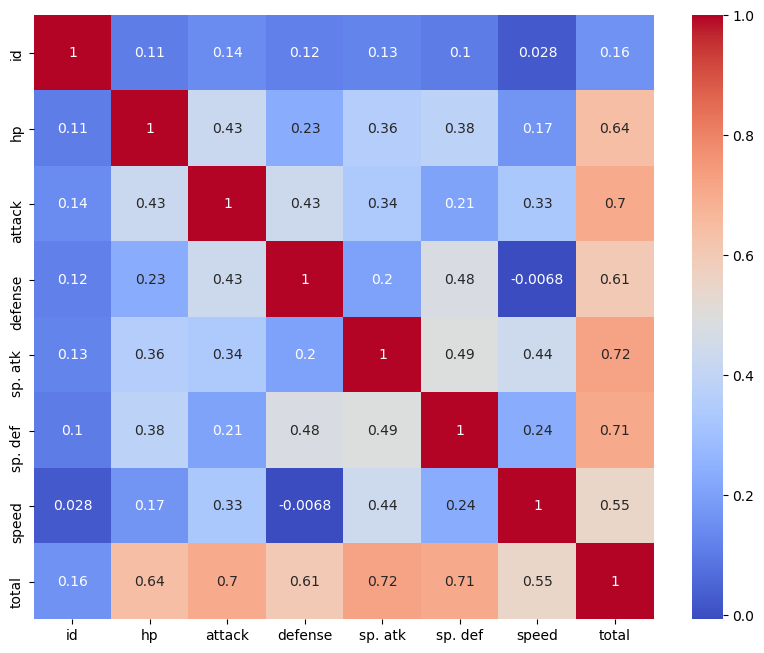

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,8), dpi = 100)
#type_corr_df = type_df.corr()
poke_statistics_corr_df = poke_statistics_df.corr()
sns.heatmap(poke_statistics_corr_df, cmap='coolwarm',annot=True,ax=axes)

## It is a very natural question to ask.
## plot differernt combinations of quantities and see if you can see any correlation. Something like this:

In [33]:
poke_statistics_df.head()

id  hp  attack  defense  sp. atk  sp. def  speed  total
0   1  45      49       49       65       65     45    318
1   2  60      62       63       80       80     60    405
2   3  80      82       83      100      100     80    525
4   4  39      52       43       60       50     65    309
5   5  58      64       58       80       65     80    405

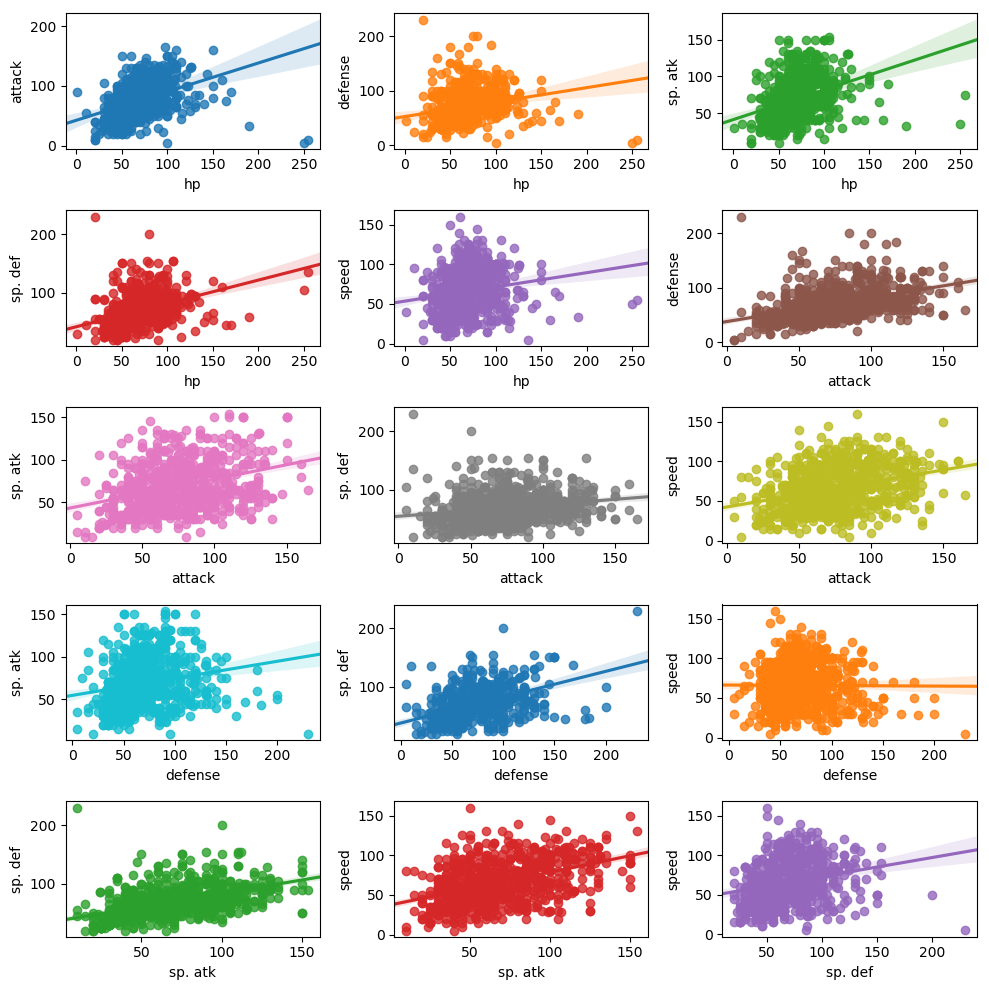

In [34]:
from  itertools import combinations
poke_statistics_new_df = poke_statistics_df.iloc[:,1:-1] # remove the first and the last column

com_poke_statistics_new_ls = list(combinations(poke_statistics_new_df.columns,2)) # all column combinations
fig, axes = plt.subplots(nrows=5, ncols=3, figsize = (10,10), edgecolor='k',dpi = 100)
#fig.subplots_adjust(hspace = 0.5, wspace=0.1)
axes = axes.ravel()
for i, num in enumerate(com_poke_statistics_new_ls):
    g = sns.regplot(x=poke_statistics_new_df[num[0]],
    y=poke_statistics_new_df[num[1]],
    data = poke_statistics_new_df, ax=axes[i])
fig.tight_layout()

In [35]:
com_poke_statistics_new_ls

[('hp', 'attack'),
 ('hp', 'defense'),
 ('hp', 'sp. atk'),
 ('hp', 'sp. def'),
 ('hp', 'speed'),
 ('attack', 'defense'),
 ('attack', 'sp. atk'),
 ('attack', 'sp. def'),
 ('attack', 'speed'),
 ('defense', 'sp. atk'),
 ('defense', 'sp. def'),
 ('defense', 'speed'),
 ('sp. atk', 'sp. def'),
 ('sp. atk', 'speed'),
 ('sp. def', 'speed')]

## It seems hard to see the correlation based on the scatter plots. Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation between
## Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients

In [36]:
com_poke_statistics_new_ls = list(combinations(poke_statistics_new_df.columns,2)) # all column combinations
for i in com_poke_statistics_new_ls:
    print(f'Correlation of {i} is {poke_statistics_new_df[i[0]].corr(poke_statistics_new_df[i[1]])}')

Correlation of ('hp', 'attack') is 0.4258389897628539
Correlation of ('hp', 'defense') is 0.2341772502826323
Correlation of ('hp', 'sp. atk') is 0.36263574342561183
Correlation of ('hp', 'sp. def') is 0.3825687278119994
Correlation of ('hp', 'speed') is 0.1700307797452308
Correlation of ('attack', 'defense') is 0.434021826133267
Correlation of ('attack', 'sp. atk') is 0.33969936758078595
Correlation of ('attack', 'sp. def') is 0.20832222041378748
Correlation of ('attack', 'speed') is 0.33217197066280524
Correlation of ('defense', 'sp. atk') is 0.20218830611273186
Correlation of ('defense', 'sp. def') is 0.47999092889600936
Correlation of ('defense', 'speed') is -0.006849220563258209
Correlation of ('sp. atk', 'sp. def') is 0.493037856826858
Correlation of ('sp. atk', 'speed') is 0.43954807409763635
Correlation of ('sp. def', 'speed') is 0.23649945471051


In [37]:
# To sort the corrolations
com_dic = {} # dictionary of all column combinations
com_poke_statistics_new_ls = list(combinations(poke_statistics_new_df.columns,2)) # all column combinations
for i in com_poke_statistics_new_ls:
    com_dic.update({f'Correlation of {i} is':poke_statistics_new_df[i[0]].corr(poke_statistics_new_df[i[1]])})
com_dic
sorted(com_dic.items(), key=operator.itemgetter(1),reverse = True)

[("Correlation of ('sp. atk', 'sp. def') is", 0.49303785682685802),
 ("Correlation of ('defense', 'sp. def') is", 0.47999092889600936),
 ("Correlation of ('sp. atk', 'speed') is", 0.43954807409763635),
 ("Correlation of ('attack', 'defense') is", 0.43402182613326701),
 ("Correlation of ('hp', 'attack') is", 0.42583898976285389),
 ("Correlation of ('hp', 'sp. def') is", 0.38256872781199941),
 ("Correlation of ('hp', 'sp. atk') is", 0.36263574342561183),
 ("Correlation of ('attack', 'sp. atk') is", 0.33969936758078595),
 ("Correlation of ('attack', 'speed') is", 0.33217197066280524),
 ("Correlation of ('sp. def', 'speed') is", 0.23649945471051001),
 ("Correlation of ('hp', 'defense') is", 0.23417725028263231),
 ("Correlation of ('attack', 'sp. def') is", 0.20832222041378748),
 ("Correlation of ('defense', 'sp. atk') is", 0.20218830611273186),
 ("Correlation of ('hp', 'speed') is", 0.17003077974523079),
 ("Correlation of ('defense', 'speed') is", -0.0068492205632582088)]

## Try seaborn's pairplot to get something like this :

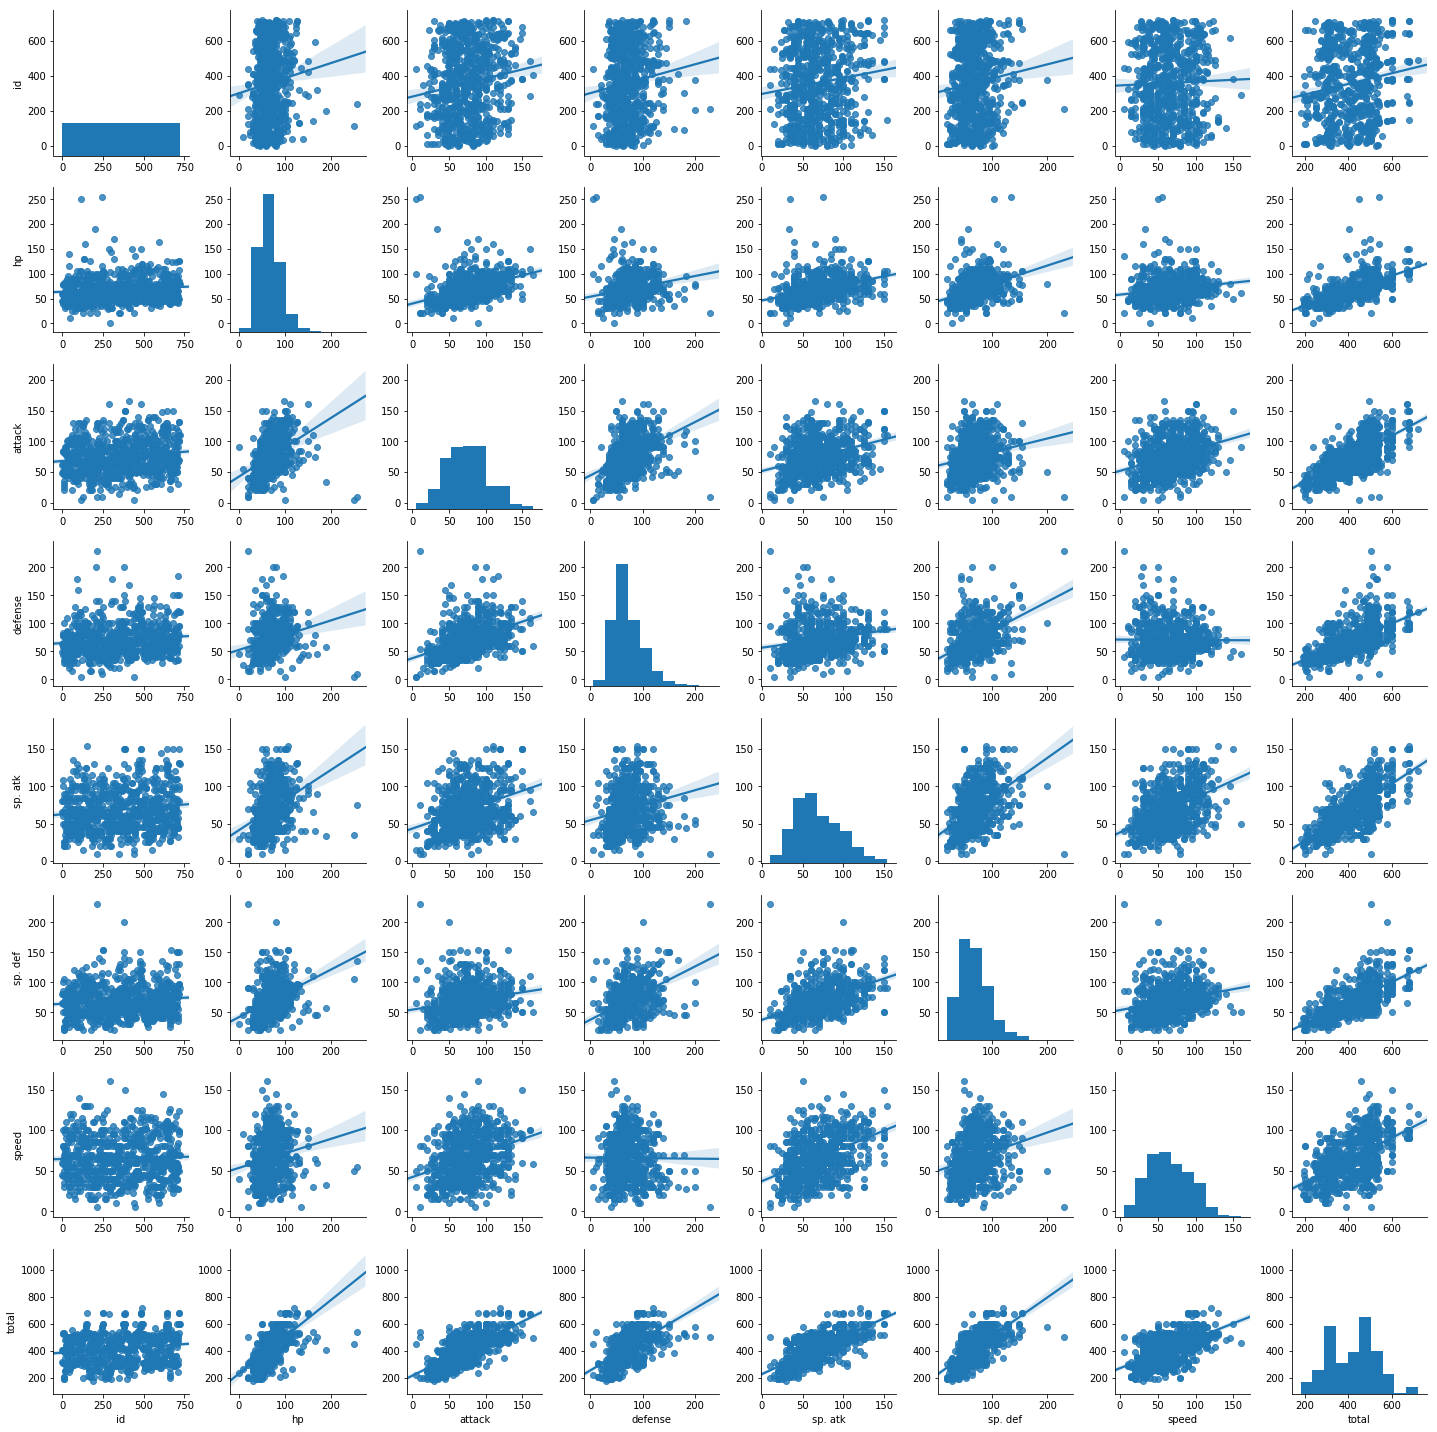

In [38]:
sns.pairplot(poke_statistics_df,kind="reg")

## Get rid of extra columns :

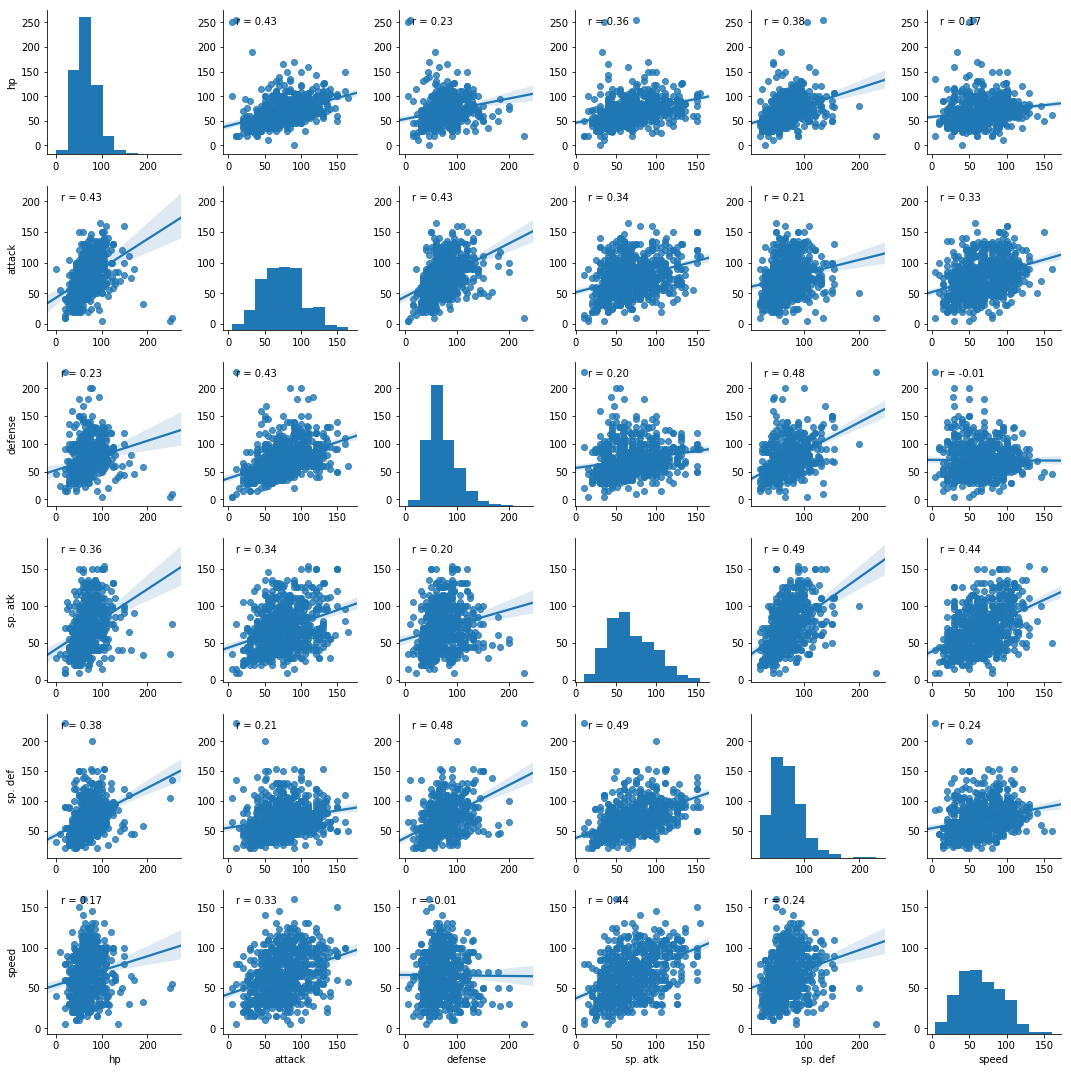

In [39]:
def corrfunc(x, y, **kws):
    r = pearsonr(x, y)[0] 
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}",xy=(.1, .9),xycoords=ax.transAxes)
    return r
sns.pairplot(poke_statistics_df.iloc[:,1:-1],kind="reg").map_offdiag(corrfunc)

## Summarize your observations/conclusions here :

### "sp. atk" and "sp. def" has the higest correlation of 0.49 and "defense" and "speed" has the lowest correlation of -0.0068. To discuss on the magnitude of the correlation we need to consider more statistical parameters like pvalue.

## What are the strongest and weakest Pokemon species?


In [40]:
t_df = poke_statistics_df.iloc[:,1:-1].join(pokedex_df[['type 1','type 2']]) # t_df stands for temporary dataframe

spec_ls = list(poke_statistics_new_df)

spec_str_df = pd.DataFrame(columns=['max','statistic','type 1', 'type 2'], index= range(0,6)) # Dataframe of strong species
spec_wek_df = pd.DataFrame(columns=['min','statistic','type 1', 'type 2'], index= range(0,6)) # Dataframe of weak speacies


for i, j in enumerate(spec_ls):
    
    max_df = t_df[t_df[spec_ls[i]] == t_df[spec_ls[i]].max()][[spec_ls[i],'type 1', 'type 2']]
    min_df = t_df[t_df[spec_ls[i]] == t_df[spec_ls[i]].min()][[spec_ls[i],'type 1', 'type 2']]

    spec_str_df.iloc[i] = pd.Series({'max':max_df.iloc[0,0], 'statistic':spec_ls[i],
                                     'type 1':max_df.iloc[0,1],'type 2':max_df.iloc[0,2] })
    
    spec_wek_df.iloc[i] = pd.Series({'min':min_df.iloc[0,0], 'statistic':spec_ls[i],
                                     'type 1':min_df.iloc[0,1],'type 2':min_df.iloc[0,2] })

In [41]:
# Strongest Pokemon
spec_str_df

max statistic   type 1   type 2
0  255        hp   Normal  Nothing
1  165    attack     Rock  Nothing
2  230   defense      Bug     Rock
3  154   sp. atk  Psychic  Nothing
4  230   sp. def      Bug     Rock
5  160     speed      Bug   Flying

In [42]:
# Weakest Pokemon
spec_wek_df

min statistic  type 1   type 2
0   1        hp     Bug    Ghost
1   5    attack  Normal  Nothing
2   5   defense  Normal  Nothing
3  10   sp. atk     Bug     Rock
4  20   sp. def     Bug  Nothing
5   5     speed     Bug     Rock

## Explain why using "Total" is not the best metric ?

### Total just gives  the sum of each statistic  but we cannot compare the efficiency of the species. Therefore, we need to standadize the data.

## Instead, try a different metric: standardize the six statistic columns independently by converting each value into a z-score so when we do take the sum, we account for the variation in the each statistic using  its mean and standard deviation across all Pokemon species.

In [43]:
poke_statistics_df.iloc[:,1:-1].mean()

hp         68.380028
attack     75.124827
defense    70.697642
sp. atk    68.848821
sp. def    69.180305
speed      65.714286
dtype: float64

In [44]:
poke_statistics_df.iloc[:,1:-1].std()

hp         25.848272
attack     29.070335
defense    29.194941
sp. atk    28.898590
sp. def    26.899364
speed      27.277920
dtype: float64

In [45]:
poke_statistics_st_df = standardize(poke_statistics_df, columns = poke_statistics_df.columns[1:-1])
poke_statistics_st_df['sum_st'] = poke_statistics_st_df.sum(axis=1)
poke_statistics_st_df.head()

hp    attack   defense   sp. atk   sp. def     speed    sum_st
0 -0.905138 -0.899300 -0.743715 -0.133276 -0.155513 -0.759906 -3.596849
1 -0.324426 -0.451799 -0.263847  0.386141  0.402508 -0.209629 -0.461052
2  0.449857  0.236666  0.421679  1.078696  1.146536  0.524073  3.857508
4 -1.137423 -0.796031 -0.949372 -0.306415 -0.713534 -0.026204 -3.928979
5 -0.401854 -0.382952 -0.435228  0.386141 -0.155513  0.524073 -0.465334

## Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, the stronger the Pokemon.

In [46]:
t_df = poke_statistics_st_df.join(pokedex_df[['type 1','type 2']]) # t_df stands for temporary dataframe
t_df = t_df.sort_values(by=['sum_st'],ascending=False) 
t_df[(t_df['type 1']=='Bug') & (t_df['type 2']=='Electric')]


hp    attack   defense   sp. atk   sp. def     speed    sum_st  \
657  0.062716  0.064549 -0.366675  0.974813 -0.341520  1.551257  1.945140   
656 -0.711567 -0.968147 -0.709438 -0.410298 -0.713534 -0.026204 -3.539189   

    type 1    type 2  
657    Bug  Electric  
656    Bug  Electric

In [47]:
t_df.head()

hp    attack   defense   sp. atk   sp. def     speed     sum_st  \
552  1.998424  1.544747  1.689902  1.771252  1.890564  1.991479  10.886368   
544  3.159849  0.856283  1.689902  1.078696  1.890564  0.890925   9.566219   
269  1.456426  0.512051  2.032665  0.732419  3.155412  1.624627   9.513600   
270  1.456426  1.888980  0.661613  1.424974  3.155412  0.890925   9.478329   
792  2.230709  1.923403  0.832995  2.152158  1.072133  1.221091   9.432488   

      type 1   type 2  
552   Normal  Nothing  
544    Ghost   Dragon  
269  Psychic   Flying  
270     Fire   Flying  
792    Fairy  Nothing

## Repeat the heatmap you created but now for the new strength metric you computed

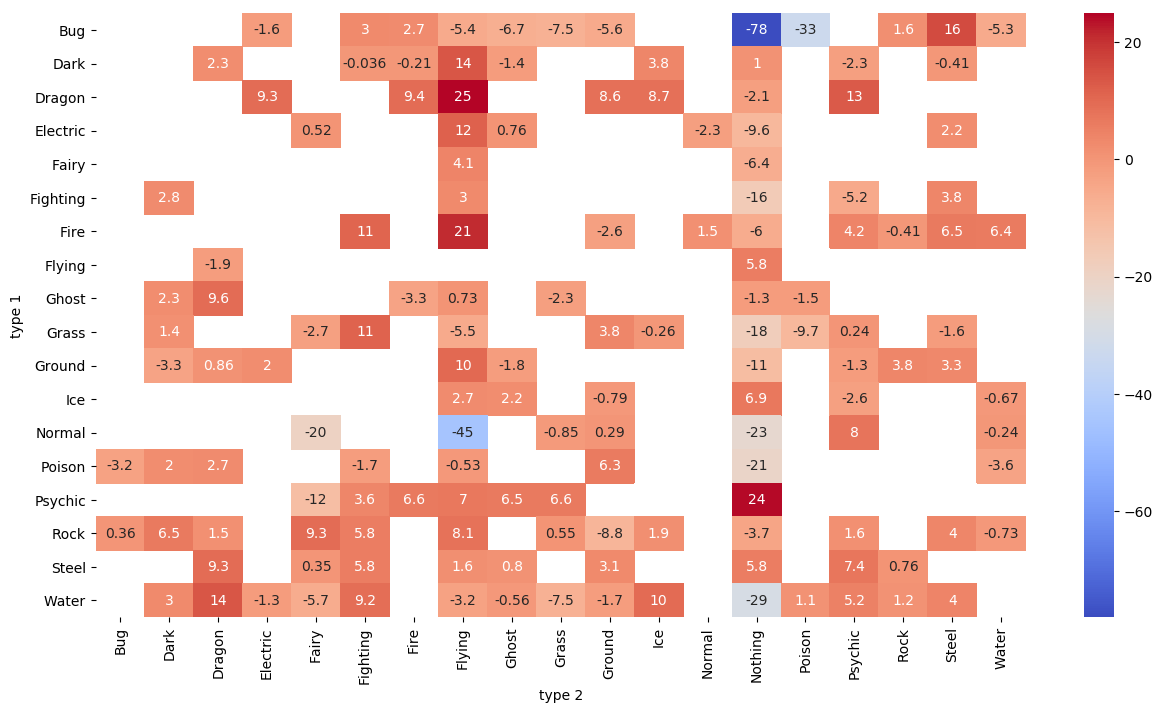

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 100)
st_df = t_df.groupby(['type 1','type 2'])['sum_st'].sum().unstack()# st_df stands for the second temporary dataframe
sns.heatmap(st_df, cmap='coolwarm',annot=True, ax=axes)

## Do any types of Pokemon excel at certain statistics over others?


In [49]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (400,100), dpi = 100)
tt_df = t_df.drop(['sum_st'], axis=1).groupby(['type 1','type 2']).sum().unstack()# tt_df stands for the third temporary dataframe
sns.heatmap(tt_df, cmap='coolwarm',annot=True,annot_kws={"size": 40}, ax= axes)

In [50]:
#t_df[(t_df['type 1']=='Dark') & (t_df['type 2']=='Dragon')]

## Do your calculations here. Create a heat map to show this at the end.

In [51]:
pd.options.display.max_columns = 200
tt_df.head()

hp                                                                   \
type 2   Bug Dark    Dragon  Electric     Fairy  Fighting      Fire    Flying   
type 1                                                                          
Bug      NaN  NaN       NaN -0.648852       NaN  0.449857  0.125432 -2.785111   
Dark     NaN  NaN  0.420433       NaN       NaN -0.842422 -0.648852  4.804422   
Dragon   NaN  NaN       NaN  1.224141       NaN       NaN  1.224141  3.580281   
Electric NaN  NaN       NaN       NaN -0.053427       NaN       NaN  0.730146   
Fairy    NaN  NaN       NaN       NaN       NaN       NaN       NaN  0.125432   

                                                                      \
type 2       Ghost     Grass    Ground       Ice   Normal    Nothing   
type 1                                                                 
Bug      -2.608561 -3.107979 -1.447136       NaN      NaN -10.083509   
Dark     -0.711567       NaN       NaN -0.455281      NaN  -2.919832   
Dragon         NaN       NaN  2.651142  2.191995      NaN  -2.794400   
Electric -0.711567       NaN       NaN       NaN -1.19085  -8.822211   
Fairy          NaN       NaN       NaN       NaN      NaN   3.650729   

                                                           attack       \
type 2      Poison   Psychic      Rock     Steel     Water    Bug Dark   
type 1                                                                   
Bug      -6.665816       NaN -2.521844  0.081294 -1.098709    NaN  NaN   
Dark           NaN  0.086718       NaN -1.035993       NaN    NaN  NaN   
Dragon         NaN  0.899715       NaN       NaN       NaN    NaN  NaN   
Electric       NaN       NaN       NaN -2.328273       NaN    NaN  NaN   
Fairy          NaN       NaN       NaN       NaN       NaN    NaN  NaN   

                                                                      \
type 2      Dragon  Electric     Fairy  Fighting      Fire    Flying   
type 1                                                                 
Bug            NaN -0.903597       NaN  1.716863 -0.180710 -5.150495   
Dark      1.019805       NaN       NaN  0.507754 -0.008594  2.938911   
Dragon         NaN  2.577444       NaN       NaN  1.544747  6.488799   
Electric       NaN       NaN -0.589491       NaN       NaN  1.880386   
Fairy          NaN       NaN       NaN       NaN       NaN -2.073986   

                                                                       \
type 2       Ghost     Grass    Ground       Ice    Normal    Nothing   
type 1                                                                  
Bug       0.512051 -0.266744 -1.036993       NaN       NaN -14.496372   
Dark     -0.004297       NaN       NaN  2.228915       NaN   2.129990   
Dragon         NaN       NaN  3.080901  1.888980       NaN   6.458720   
Electric -0.864877       NaN       NaN       NaN -1.970717  -5.481741   
Fairy          NaN       NaN       NaN       NaN       NaN  -5.881976   

                                                           defense       \
type 2      Poison   Psychic      Rock     Steel     Water     Bug Dark   
type 1                                                                    
Bug      -5.382864       NaN -1.906167  7.172966 -1.553341     NaN  NaN   
Dark           NaN -0.146287       NaN  2.056799       NaN     NaN  NaN   
Dragon         NaN  0.679870       NaN       NaN       NaN     NaN  NaN   
Electric       NaN       NaN       NaN -2.078283       NaN     NaN  NaN   
Fairy          NaN       NaN       NaN       NaN       NaN     NaN  NaN   

                                                                      \
type 2      Dragon  Electric     Fairy  Fighting      Fire    Flying   
type 1                                                                 
Bug            NaN -1.076114       NaN  0.147469 -0.733351 -6.069280   
Dark     -0.071738       NaN       NaN  1.494608 -2.104402  0.531687   
Dragon         NaN  1.689902       NaN       NaN  1.004376  2.475071

In [52]:
spec_ls = list(t_df.columns[0:-3])
spec_df = pd.DataFrame(columns=['max','statistic','type 1', 'type 2'], index= range(0,6))


for i, j in enumerate(spec_ls):
    
    b_df = t_df[t_df[spec_ls[i]] == t_df[spec_ls[i]].max()][[spec_ls[i],'type 1', 'type 2']] # b_df stands for the dataframe of the best statistic

    spec_df.iloc[i] = pd.Series({'max':b_df.iloc[0,0], 'statistic':spec_ls[i], 'type 1':b_df.iloc[0,1],'type 2':b_df.iloc[0,2] }) #spec_df stands for the species dataframe

spec_df

max statistic   type 1   type 2
0  7.22484        hp   Normal  Nothing
1  3.09379    attack     Rock  Nothing
2  5.46029   defense      Bug     Rock
3   2.9486   sp. atk  Psychic  Nothing
4  5.98272   sp. def      Bug     Rock
5  3.45888     speed      Bug   Flying

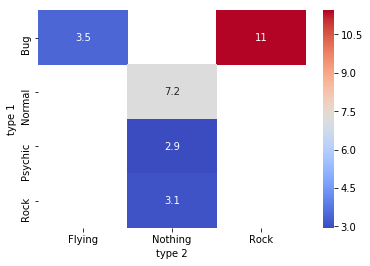

In [53]:
ft_df = spec_df.groupby(['type 1','type 2']).sum().unstack() # ft_df stands fot the fourth temporary dataframe

sns.heatmap(ft_df['max'], annot=True, cmap='coolwarm')

## Are any of the statistics correlated? Do your calculations here. Create a set of correlation plots as you did before to show this at the end.

### I believe that I answered this question above. Actually, I did not understand the difference between this question and the similar question in the previous section.

### It shoud be mentioned that the last heatmap shows the sum of the scores and if a pokeman type is the best for more than one statistic, it just demonstrates one number. for example the Bug-Rocks type is the best in terms of defence and sp. def and on the above heatmap there is only one number (sum of the statistics) reflects the properties of this type.
